In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.decomposition import PCA



from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("jena_climate_2009_2016.csv")
print(data.head())

             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [3]:
# Предобработка данных
# Удаляем ненужные столбцы
data = data.drop(['Date Time'], axis=1)

In [4]:
# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [5]:
# Снижение размерности с помощью PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [6]:
# Кластеризация данных
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(scaled_data)

C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# Добавляем метки кластеров в исходный набор данных
data['Cluster'] = labels

# Вывод результатов
print(data.head())

   p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
0    996.52     -8.02    265.40        -8.90    93.3          3.33   
1    996.57     -8.41    265.01        -9.28    93.4          3.23   
2    996.53     -8.51    264.91        -9.31    93.9          3.21   
3    996.51     -8.31    265.12        -9.07    94.2          3.26   
4    996.51     -8.27    265.15        -9.04    94.1          3.27   

   VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
0          3.11          0.22       1.94             3.12       1307.75   
1          3.02          0.21       1.89             3.03       1309.80   
2          3.01          0.20       1.88             3.02       1310.24   
3          3.07          0.19       1.92             3.08       1309.19   
4          3.08          0.19       1.92             3.09       1309.00   

   wv (m/s)  max. wv (m/s)  wd (deg)  Cluster  
0      1.03           1.75     152.3        2  
1      0.72           1.50     1

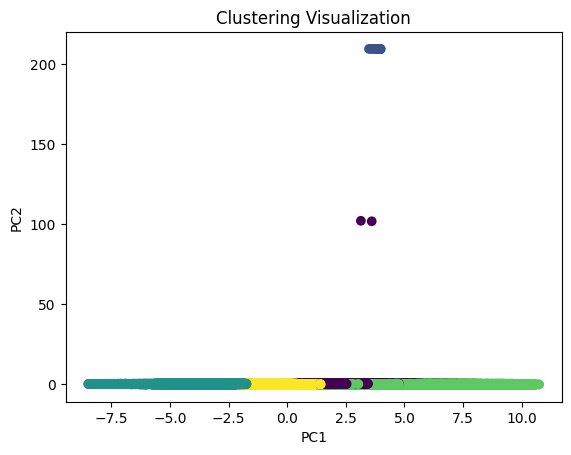

In [8]:
# Визуализация модели кластеризации
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Visualization')
plt.show()

In [33]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'

df = pd.read_csv(dataset_url,
                 names = [
                     'variance',
                     'skewness',
                     'curtosis',
                     'entropy',
                     'class',
                 ],
                )
print (df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [34]:
# Получение исходных классов
true_labels = df['class']

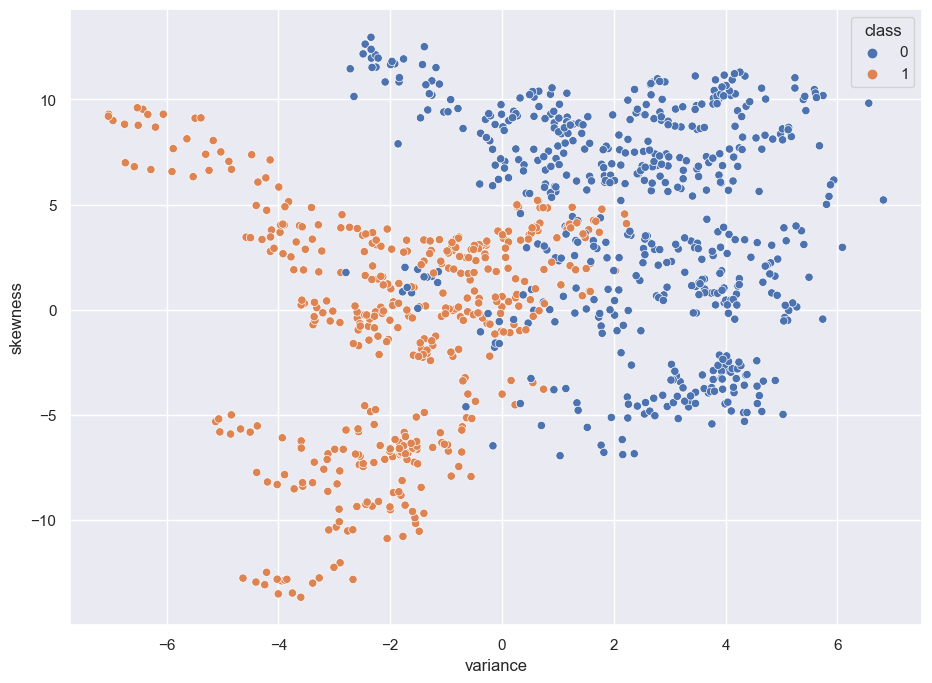

In [23]:
sns.set(rc={'figure.figsize':(11,8)})

sns.scatterplot(x='variance', y='skewness', hue='class', data=df.sample(1000));

In [24]:
# Предобработка данных
# Удаляем ненужные столбцы
df = df.drop(['class'], axis=1)

In [25]:
# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [26]:
# Снижение размерности с помощью PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [27]:
# Кластеризация данных
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled_data)

C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# Добавляем метки кластеров в исходный набор данных
df['Cluster'] = labels

# Вывод результатов
print(df.head())

   variance  skewness  curtosis  entropy  Cluster
0   3.62160    8.6661   -2.8073 -0.44699        1
1   4.54590    8.1674   -2.4586 -1.46210        1
2   3.86600   -2.6383    1.9242  0.10645        0
3   3.45660    9.5228   -4.0112 -3.59440        1
4   0.32924   -4.4552    4.5718 -0.98880        0


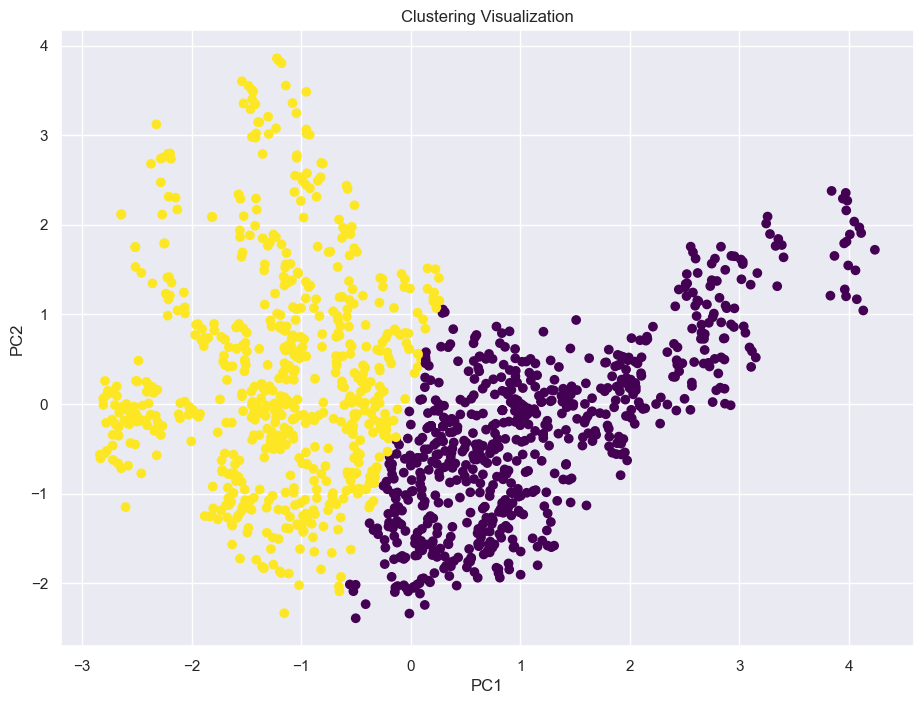

In [31]:
# Визуализация модели кластеризации
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Visualization')
plt.show()

In [37]:
# Вычисление точности
accuracy = accuracy_score(true_labels, labels)

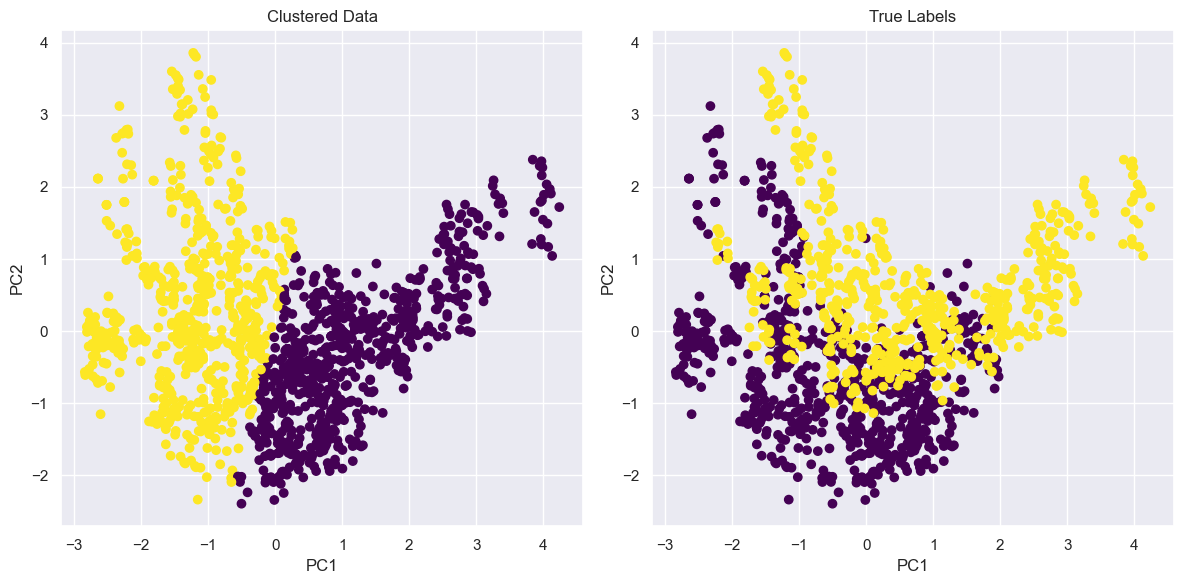

Accuracy: 0.44169096209912534


In [38]:
# Визуализация модели кластеризации и исходных классов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustered Data')

plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=true_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('True Labels')

plt.tight_layout()
plt.show()

print("Accuracy:", accuracy)

In [35]:
# Загрузка данных
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [ ]:
# Преобразование столбца 'class' из строковых значений в целочисленные значения
class_mapping = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 0}
data['class'] = data['class'].map(class_mapping)

In [ ]:
# Получение исходных классов
true_labels = data['class']

In [ ]:
# Удаление столбца "class"
data = data.drop(columns=['class'])

In [ ]:
# Предобработка данных
# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
# Снижение размерности с помощью PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)

In [ ]:
# Кластеризация данных
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_data)

In [ ]:
# Визуализация модели кластеризации
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustered Iris Data')
plt.show()

In [ ]:
# Визуализация модели кластеризации и исходных классов
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(1, 2, 1)


# График кластеризации
ax[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Clustered Iris Data')

# График с исходными классами
ax[1].scatter(reduced_data[:, 0], reduced_data[:, 1], c=true_labels, cmap='viridis')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Original Iris Classes')

plt.tight_layout()
plt.show()

In [ ]:
# Вычисление точности
# print (true_labels.head(150))
# print (labels)
# true_labels_1 = true_labels[true_labels == 1]
# true_labels_0 = true_labels[true_labels == 0]
# true_labels_2 = true_labels[true_labels == 2]
# print (true_labels_0)


accuracy = accuracy_score(true_labels, labels)
print("Accuracy:", accuracy)